# E-Library Date Insights Dashboard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries show successfully.")

Libraries show successfully.


# data input and validation 

In [2]:
data = pd.read_csv("library_transactions.csv")
print("Data loaded successfully.",data.head())
class LibraryDashboard:

    def __init__(self):
        self.data = None

    def load_data(self, file_path):
        self.data = pd.read_csv(file_path)
        self.data["Date"] = pd.to_datetime(self.data["Date"])

        self.data.dropna(inplace=True)

        self.data.drop_duplicates(inplace=True)

        print("Data loaded successfully.")

    def calculate_statistics(self):
        durations = np.array(self.data["Borrowing_Duration_Days"])

        print("Borrowing Duration")
        print("Average Duration:", np.mean(durations))
        print("Maximum Duration:", np.max(durations))
        print("Minimum Duration:", np.min(durations))

        print("Pandas Grouping & Aggregation")

        borrow_per_book = self.data.groupby("Book_Title").size()
        print("Total Borrowings per Book:", borrow_per_book.head())

        avg_duration_genre = self.data.groupby("Genre")["Borrowing_Duration_Days"].mean()
        print("Average Duration by Genre:", avg_duration_genre)


    def filter_data(self, **conditions):
        filtered_data = self.data.copy()

        for column, value in conditions.items():
            filtered_data = filtered_data[filtered_data[column] == value]

        return filtered_data    
    

Data loaded successfully.    Transaction_ID                   Book_Title            Author  \
0               1   Introduction to Algorithms  Thomas H. Cormen   
1               2        Data Science Handbook         Andrew Ng   
2               3           Python Programming     Wayne Winston   
3               4  Web Development with Django         Andrew Ng   
4               5           Python Programming         Andrew Ng   

          Genre           ISBN  Publisher  Publication_Year Language  Pages  \
0      Database  9780601973541    OReilly              2016  English    928   
1      Database  9780783638886    Pearson              2019  English   1146   
2    Algorithms  9780491257108  MIT Press              2015  English   1036   
3  Data Science  9780913724358      Wiley              2019  English    330   
4            AI  9780687439597    Pearson              2021  English    341   

   Available_Copies  Total_Copies User_ID   User_Name Borrowing_Duration_Days  \
0        

In [4]:
dashboard = LibraryDashboard()

if dashboard.load_data("library_transactions.csv"):
    dashboard.calculate_statistics()


    filtered_data = dashboard.filter_transactions("Category == 'Computer Science'")
    print("Filtered Records:")
    print(filtered_data.head())

dataframe = dashboard.data 
print("Dataframe for visualization:",dataframe.head())


Data loaded successfully.
Dataframe for visualization:    Transaction_ID                   Book_Title            Author  \
0               1   Introduction to Algorithms  Thomas H. Cormen   
1               2        Data Science Handbook         Andrew Ng   
2               3           Python Programming     Wayne Winston   
3               4  Web Development with Django         Andrew Ng   
4               5           Python Programming         Andrew Ng   

          Genre           ISBN  Publisher  Publication_Year Language  Pages  \
0      Database  9780601973541    OReilly              2016  English    928   
1      Database  9780783638886    Pearson              2019  English   1146   
2    Algorithms  9780491257108  MIT Press              2015  English   1036   
3  Data Science  9780913724358      Wiley              2019  English    330   
4            AI  9780687439597    Pearson              2021  English    341   

   Available_Copies  Total_Copies User_ID   User_Name Borrowi

# bar chart : top 5 most borrowed books.

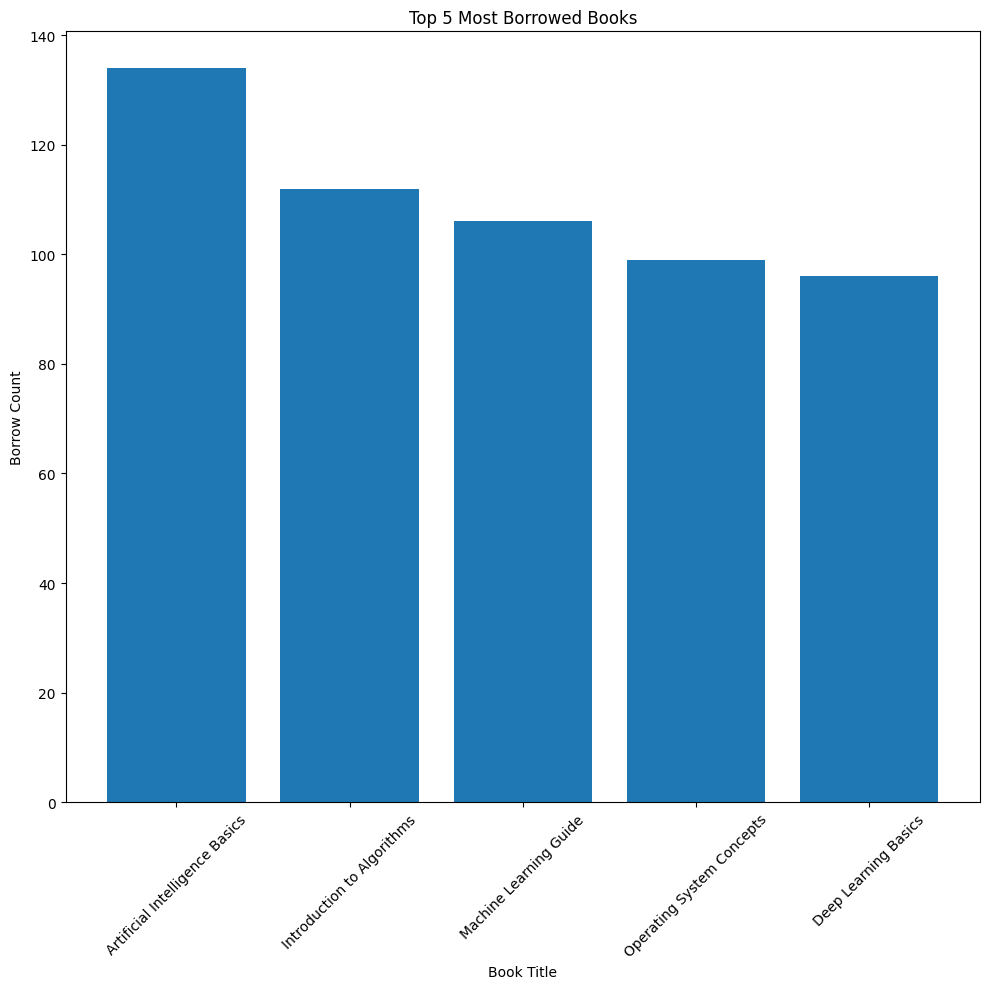

In [5]:

top_books = dashboard.data["Book_Title"].value_counts().head(5)

plt.figure(figsize=(10, 10))
plt.bar(top_books.index, top_books.values)
plt.title("Top 5 Most Borrowed Books")
plt.xlabel("Book Title")
plt.ylabel("Borrow Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Line graph: borrowing trends over months.

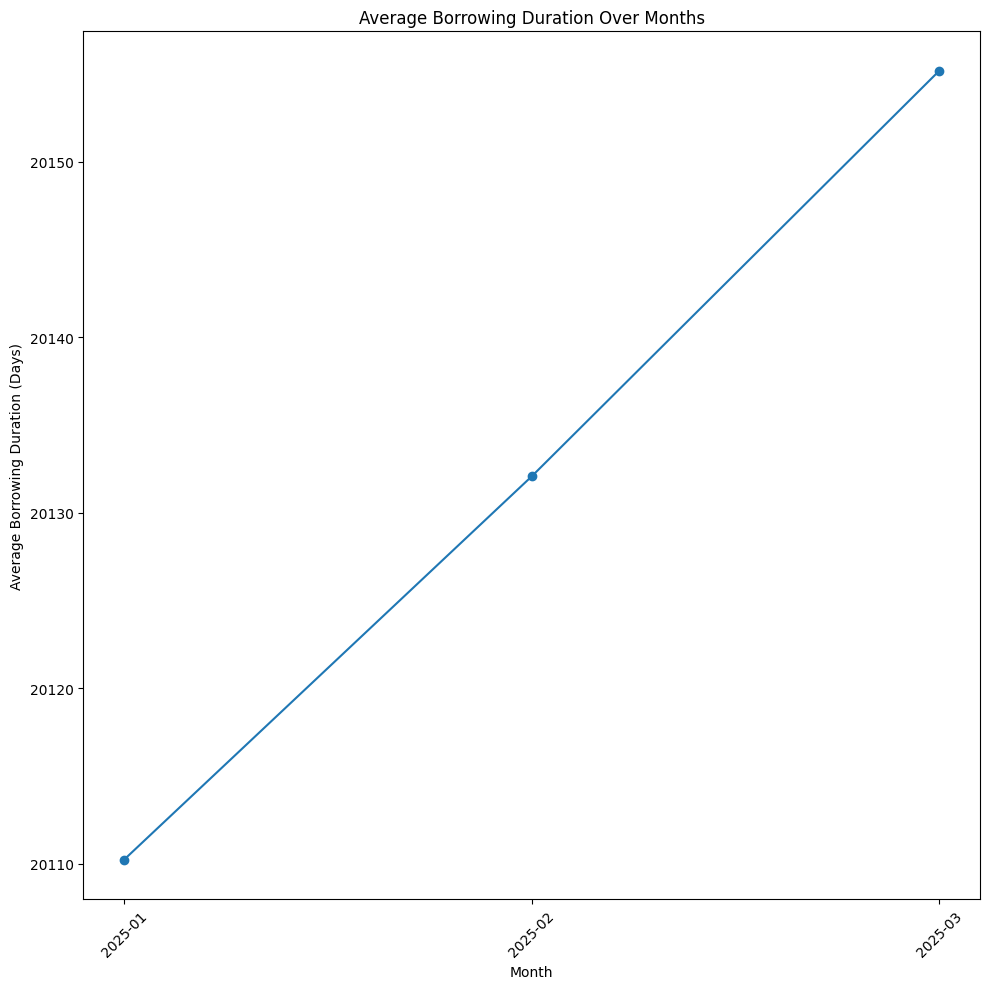

In [7]:
plt.figure(figsize=(10,10))
dashboard.data['Month'] = dashboard.data['Date'].dt.to_period('M')
dashboard.data['Borrowing_Duration_Days'] = (dashboard.data['Date'] - pd.to_datetime(dashboard.data['Borrowing_Duration_Days'])).dt.days
monthly_duration = dashboard.data.groupby('Month')["Borrowing_Duration_Days"].mean()
plt.plot(monthly_duration.index.astype(str), monthly_duration.values, marker='o')
plt.title("Average Borrowing Duration Over Months")
plt.xlabel("Month")
plt.ylabel("Average Borrowing Duration (Days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Pie chart: distribution of books borrowed by genre.

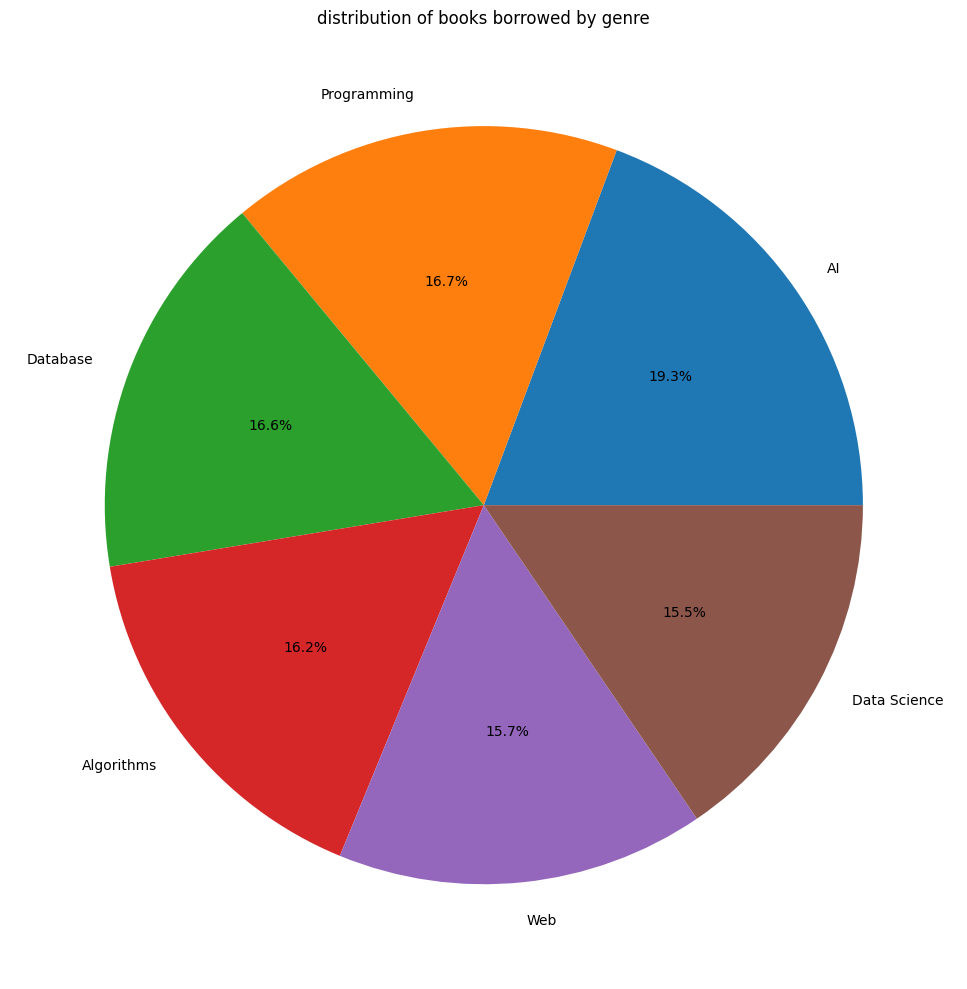

In [8]:
plt.figure(figsize=(10,10))
plt.pie(dashboard.data["Genre"].value_counts(), labels=dashboard.data["Genre"].value_counts().index, autopct='%1.1f%%')
plt.title("distribution of books borrowed by genre")
plt.tight_layout()
plt.show()


# heatmap : Borrowing activity by day and time

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Hour, Length: 1000, dtype: int32
Hour
0    1000
dtype: int64


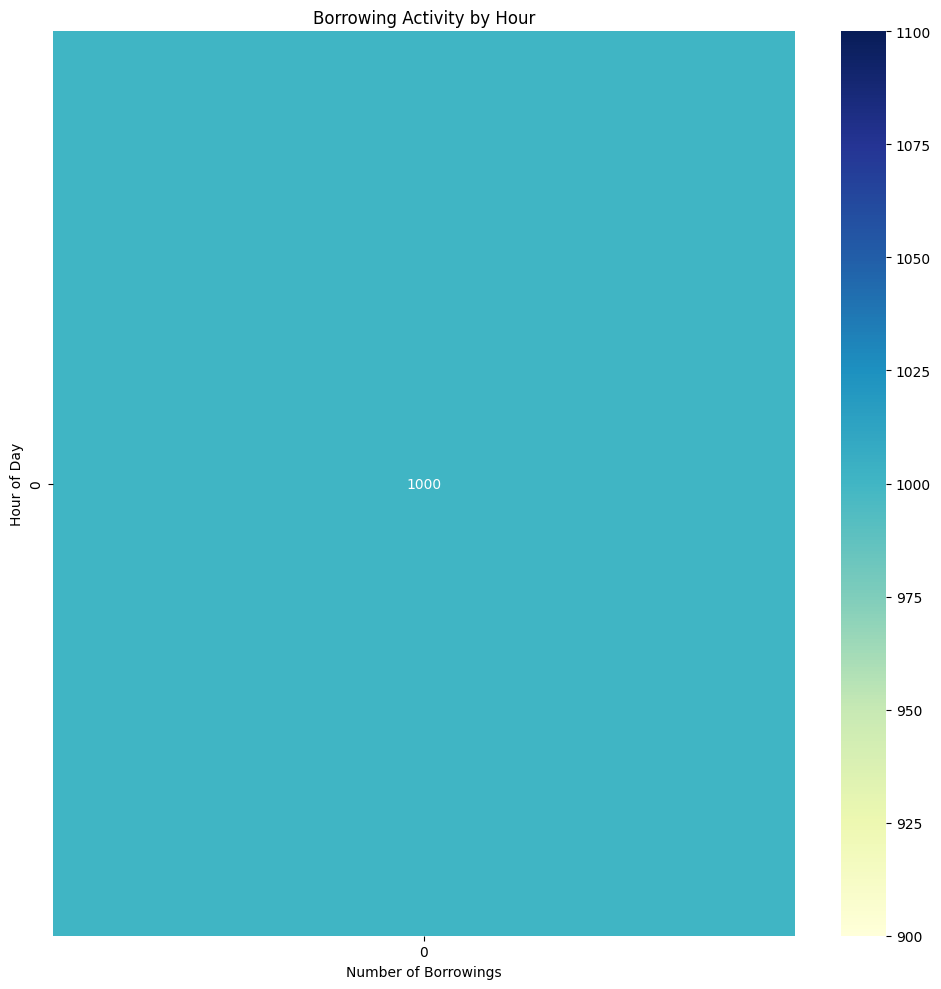

In [9]:
plt.figure(figsize=(10,10))
dashboard.data['Hour'] = dashboard.data['Date'].dt.hour
print(dashboard.data['Hour'])
hourly_activity = dashboard.data.groupby('Hour').size()
print(hourly_activity)
sns.heatmap(hourly_activity.values.reshape(-1, 1), annot=True,fmt='d' ,cmap="YlGnBu")
plt.title("Borrowing Activity by Hour")
plt.xlabel("Number of Borrowings")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()
